# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [23]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [14]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url)

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
btc_response = json.dumps(btc_response.json(), indent=True, sort_keys=True)
print(btc_response)

{
 "data": {
  "1": {
   "circulating_supply": 18879600,
   "id": 1,
   "last_updated": 1637524465,
   "max_supply": 21000000,
   "name": "Bitcoin",
   "quotes": {
    "USD": {
     "market_cap": 1125425642350,
     "percent_change_1h": -0.151418148215776,
     "percent_change_24h": -0.0487896266353673,
     "percent_change_7d": -7.76935610633003,
     "percentage_change_1h": -0.151418148215776,
     "percentage_change_24h": -0.0487896266353673,
     "percentage_change_7d": -7.76935610633003,
     "price": 59637.0,
     "volume_24h": 25033615076
    }
   },
   "rank": 1,
   "symbol": "BTC",
   "total_supply": 18879600,
   "website_slug": "bitcoin"
  }
 },
 "metadata": {
  "error": null,
  "num_cryptocurrencies": 3105,
  "timestamp": 1637524465
 }
}


In [9]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url)

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
eth_response = json.dumps(eth_response.json(), indent=True, sort_keys=True)
print(eth_response)

{
 "data": {
  "1027": {
   "circulating_supply": 118434713,
   "id": 1027,
   "last_updated": 1637523730,
   "max_supply": 0,
   "name": "Ethereum",
   "quotes": {
    "USD": {
     "market_cap": 518007130265,
     "percent_change_1h": -0.329018742130856,
     "percent_change_24h": -0.166720037872927,
     "percent_change_7d": -6.27281035178012,
     "percentage_change_1h": -0.329018742130856,
     "percentage_change_24h": -0.166720037872927,
     "percentage_change_7d": -6.27281035178012,
     "price": 4373.78,
     "volume_24h": 14635847221
    }
   },
   "rank": 2,
   "symbol": "ETH",
   "total_supply": 118434713,
   "website_slug": "ethereum"
  }
 },
 "metadata": {
  "error": null,
  "num_cryptocurrencies": 3105,
  "timestamp": 1637523730
 }
}


#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [15]:
# Navigate the BTC response object to access the current price of BTC
btc_price = json.loads(btc_response)['data']['1']['quotes']['USD']['price']

# Print the current price of BTC
print(btc_price)


59637.0


In [16]:
# Navigate the BTC response object to access the current price of ETH
eth_price = json.loads(eth_response)['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
print(eth_price)


4373.78


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [17]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price

# Print current value of your holding in BTC
print(btc_value)


71564.4


In [18]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * eth_price

# Print current value of your holding in ETH
print(eth_value)


23181.034


In [19]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(total_crypto_wallet)


94745.434


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [20]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [24]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [25]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY", "AGG"]

# Set timeframe to 1D 
timeframe = "1D"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp("2021-11-19", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-11-19", tz="America/New_York").isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [60]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
closing_prices = alpaca.get_barset(tickers, start=start_date, timeframe=timeframe, limit=1).df

# Review the first 5 rows of the Alpaca DataFrame
closing_prices.head()


AGG                                       SPY  \
                             open    high      low   close   volume    open   
time                                                                          
2021-11-19 00:00:00-05:00  114.49  114.59  114.415  114.45  4843203  469.61   

                                                            
                             high    low   close    volume  
time                                                        
2021-11-19 00:00:00-05:00  470.94  468.5  468.91  49009452

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [44]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number

#agg_close_price = closing_prices['AGG'].iat[0, 3]    # STUDENT NOTE: I wanted raw float, not df containing 1 value
agg_closing_price = float(closing_prices['SPY']['close'])    # These two are functionally equivalent

# Print the AGG closing price
print(agg_close_price)


114.45


In [46]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number

#spy_close_price = closing_prices['SPY'].iat[0, 3]    # STUDENT NOTE: I wanted raw float, not df containing 1 value
spy_close_price = float(closing_prices['SPY']['close'])    # These two are functionally equivalent

# Print the SPY closing price
print(spy_close_price)


468.91


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [45]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price

# Print the current value of the bond portfolio
print(f"Current AGG Bond Value: {agg_value}")


Current AGG Bond Value: 22890.0


In [48]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price

# Print the current value of the stock portfolio
print(f"Current SPY Shares Value: {spy_value}")

Current SPY Shares Value: 51580.100000000006


In [51]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
print(f"Current Stocks and Bonds Portfolio Balance: {total_stocks_bonds}")


Current Stocks and Bonds Portfolio Balance: 74470.1


In [52]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current cryptocurrency wallet balance
print(f"Total Portfolio Balance: {total_portfolio}")


Total Portfolio Balance: 169215.53399999999


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [53]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
print(savings_data)
    

[94745.434, 74470.1]


#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [54]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(savings_data, columns=['amount'], index=['crypto', 'stock/bond'])

# Display the savings_df DataFrame
savings_df


,amount
crypto,94745.434
stock/bond,74470.100


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Retirement Portfolio Composition'}, ylabel='amount'>

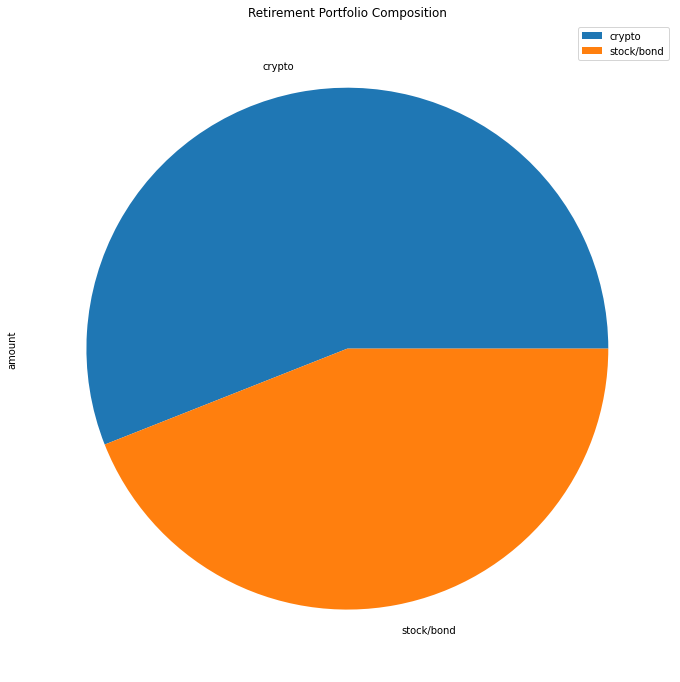

In [57]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot(kind='pie', y='amount', figsize=(14,12), title="Retirement Portfolio Composition")


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [58]:
# Create a variable named emergency_fund_value
emergency_fund_value = 3 * monthly_income


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [59]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print('Congratulations, there is sufficient money in this fund!')
elif total_portfolio == emergency_fund_value:
    print('Congratulations on reaching this important financial goal!')
else:
    print(f"You are ${emergency_fund_value - total_portfolio} away from reaching the goal!")


Congratulations, there is sufficient money in this fund!


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [63]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
three_prior_start_date = pd.Timestamp("2018-11-19", tz="America/New_York").isoformat()
three_prior_end_date = pd.Timestamp("2021-11-19", tz="America/New_York").isoformat()

# Set number of rows to 1000 to retrieve the maximum amount of rows
max_limit = 1000

In [81]:
# Use the Alpaca get_barset function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
three_prior_df = alpaca.get_barset(tickers, timeframe=timeframe, start=three_prior_start_date, limit=max_limit).df


# Display both the first and last five rows of the DataFrame
three_prior_df


AGG                                         SPY  \
                             open      high      low   close   volume    open   
time                                                                            
2018-11-19 00:00:00-05:00  104.61  104.7299  104.610  104.66  4354256  273.05   
2018-11-20 00:00:00-05:00  104.67  104.7200  104.610  104.61  3015946  265.36   
2018-11-21 00:00:00-05:00  104.60  104.6900  104.580  104.68  5492705  265.86   
2018-11-23 00:00:00-05:00  104.84  104.8400  104.650  104.65  1536835  263.18   
2018-11-26 00:00:00-05:00  104.67  104.6700  104.590  104.63  3510989  265.78   
...                           ...       ...      ...     ...      ...     ...   
2021-11-15 00:00:00-05:00  114.30  114.3100  113.910  113.93  6219329  468.64   
2021-11-16 00:00:00-05:00  113.92  114.1100  113.840  113.87  5317284  467.16   
2021-11-17 00:00:00-05:00  113.79  114.1300  113.770  114.13  5513227  469.00   
2021-11-18 00:00:00-05:00  114.05  114.2800  114.030  114.23  4115721  469.24   
2021-11-19 00:00:00-05:00  114.49  114.5900  114.415  114.45  4843203  469.61   

                                                                  
                               high       low   close     volume  
time                                                              
2018-11-19 00:00:00-05:00  273.6176  266.7480  269.08   86509084  
2018-11-20 00:00:00-05:00  269.1000  263.1500  264.18  121173305  
2018-11-21 00:00:00-05:00  267.1500  264.2527  265.08   64743156  
2018-11-23 00:00:00-05:00  265.0662  263.0700  263.34   36245484  
2018-11-26 00:00:00-05:00  268.2909  263.3652  267.46   67385154  
...                             ...       ...     ...        ...  
2021-11-15 00:00:00-05:00  468.8100  466.2300  467.39   39813913  
2021-11-16 00:00:00-05:00  470.4850  467.0700  469.24   41723421  
2021-11-17 00:00:00-05:00  469.1900  467.4800  468.11   40088372  
2021-11-18 00:00:00-05:00  470.0100  466.3400  469.71   45100029  
2021-11-19 00:00:00-05:00  470.9400  468.5000  468.91   49009452  

[757 rows x 10 columns]

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [82]:
# EXTRA STUDENT CODE, cleaning the data
three_prior_closing_df = pd.concat([three_prior_df['AGG']['close'], three_prior_df['SPY']['close']], axis=1, keys=['AGG Close', 'SPY Close'])
three_prior_closing_df

,AGG Close,SPY Close
time,,
2018-11-19 00:00:00-05:00,104.66,269.08
2018-11-20 00:00:00-05:00,104.61,264.18
2018-11-21 00:00:00-05:00,104.68,265.08
2018-11-23 00:00:00-05:00,104.65,263.34
2018-11-26 00:00:00-05:00,104.63,267.46
...,...,...
2021-11-15 00:00:00-05:00,113.93,467.39
2021-11-16 00:00:00-05:00,113.87,469.24
2021-11-17 00:00:00-05:00,114.13,468.11


In [91]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
mc_sim = MCSimulation(three_prior_df, [0.4, 0.6], 500, 30*252)    # Positional only args kinda ambiguous :(

# Review the simulation input data
mc_sim.portfolio_data


AGG                                      \
                             open      high      low   close   volume   
time                                                                    
2018-11-19 00:00:00-05:00  104.61  104.7299  104.610  104.66  4354256   
2018-11-20 00:00:00-05:00  104.67  104.7200  104.610  104.61  3015946   
2018-11-21 00:00:00-05:00  104.60  104.6900  104.580  104.68  5492705   
2018-11-23 00:00:00-05:00  104.84  104.8400  104.650  104.65  1536835   
2018-11-26 00:00:00-05:00  104.67  104.6700  104.590  104.63  3510989   
...                           ...       ...      ...     ...      ...   
2021-11-15 00:00:00-05:00  114.30  114.3100  113.910  113.93  6219329   
2021-11-16 00:00:00-05:00  113.92  114.1100  113.840  113.87  5317284   
2021-11-17 00:00:00-05:00  113.79  114.1300  113.770  114.13  5513227   
2021-11-18 00:00:00-05:00  114.05  114.2800  114.030  114.23  4115721   
2021-11-19 00:00:00-05:00  114.49  114.5900  114.415  114.45  4843203   

                                           SPY                              \
                          daily_return    open      high       low   close   
time                                                                         
2018-11-19 00:00:00-05:00          NaN  273.05  273.6176  266.7480  269.08   
2018-11-20 00:00:00-05:00    -0.000478  265.36  269.1000  263.1500  264.18   
2018-11-21 00:00:00-05:00     0.000669  265.86  267.1500  264.2527  265.08   
2018-11-23 00:00:00-05:00    -0.000287  263.18  265.0662  263.0700  263.34   
2018-11-26 00:00:00-05:00    -0.000191  265.78  268.2909  263.3652  267.46   
...                                ...     ...       ...       ...     ...   
2021-11-15 00:00:00-05:00    -0.003499  468.64  468.8100  466.2300  467.39   
2021-11-16 00:00:00-05:00    -0.000527  467.16  470.4850  467.0700  469.24   
2021-11-17 00:00:00-05:00     0.002283  469.00  469.1900  467.4800  468.11   
2021-11-18 00:00:00-05:00     0.000876  469.24  470.0100  466.3400  469.71   
2021-11-19 00:00:00-05:00     0.001926  469.61  470.9400  468.5000  468.91   

                                                   
                              volume daily_return  
time                                               
2018-11-19 00:00:00-05:00   86509084          NaN  
2018-11-20 00:00:00-05:00  121173305    -0.018210  
2018-11-21 00:00:00-05:00   64743156     0.003407  
2018-11-23 00:00:00-05:00   36245484    -0.006564  
2018-11-26 00:00:00-05:00   67385154     0.015645  
...                              ...          ...  
2021-11-15 00:00:00-05:00   39813913     0.000278  
2021-11-16 00:00:00-05:00   41723421     0.003958  
2021-11-17 00:00:00-05:00   40088372    -0.002408  
2021-11-18 00:00:00-05:00   45100029     0.003418  
2021-11-19 00:00:00-05:00   49009452    -0.001703  

[757 rows x 12 columns]

In [93]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
mc_df = mc_sim.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/home/sfdev/Documents/FinTech Activities/Challenge Repo/Module 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

<AxesSubplot:title={'center':'30 Year Monte Carlo Simulation'}, xlabel='Number of Trading Days in the Future', ylabel='Cumulative Return'>

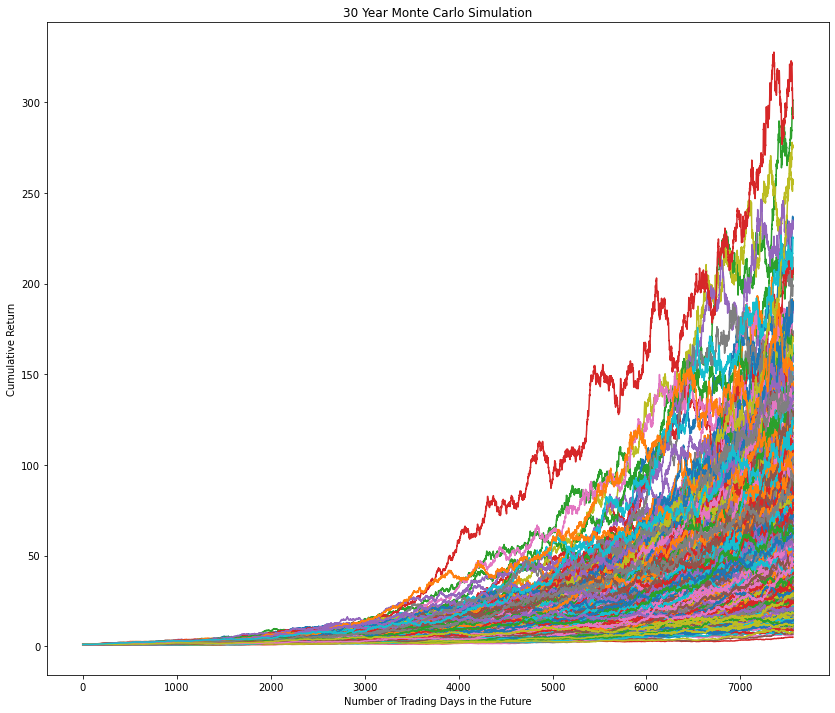

In [164]:
# Visualize the 30-year Monte Carlo simulation by creating an
mc_df.plot(figsize=(14,12), title="30 Year Monte Carlo Simulation", xlabel="Number of Trading Days in the Future", ylabel="Cumulative Return", legend=False)


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

Text(0.5, 0, 'Cumulative Return')

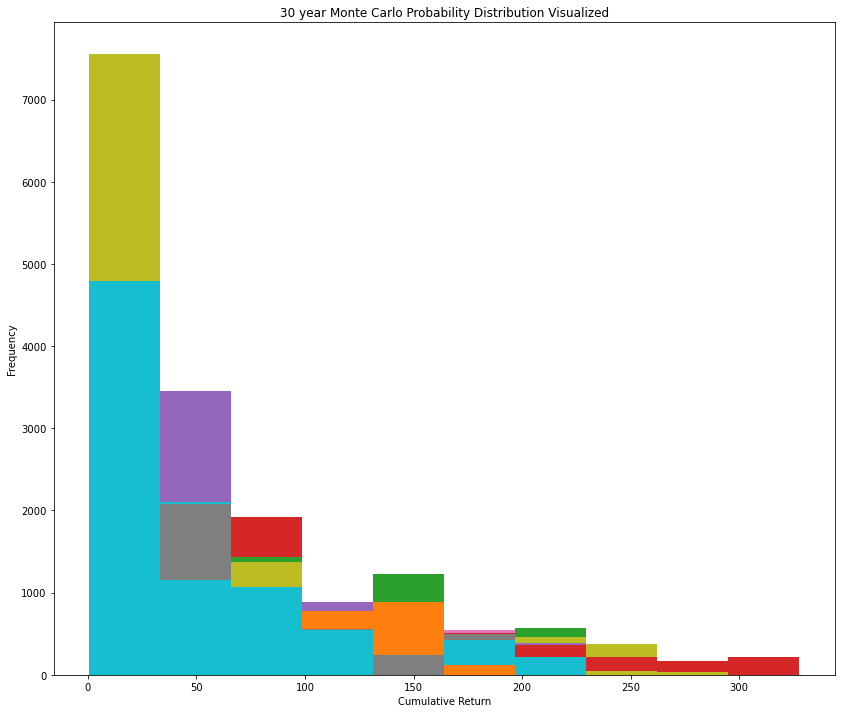

In [126]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
mc_df.plot(kind='hist',
           title="30 year Monte Carlo Probability Distribution Visualized",
           figsize=(14,12),
           legend=False).set_xlabel("Cumulative Return")


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [108]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
mc_sim_summary_stats = mc_df.describe()


# Review the 30-year Monte Carlo summary statistics
mc_sim_summary_stats

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
count,7561.000000,7561.000000,7561.000000,7561.000000,7561.000000,7561.000000,7561.000000,7561.000000,7561.000000,7561.000000,...,7561.000000,7561.000000,7561.000000,7561.000000,7561.000000,7561.000000,7561.000000,7561.000000,7561.000000,7561.000000
mean,5.310170,9.422843,17.387847,13.075562,7.148845,20.458934,7.710815,10.642884,8.661617,12.839534,...,14.567545,51.093851,15.088176,8.147497,11.684205,9.236159,8.556281,34.629513,7.310355,32.680100
std,4.155698,8.697196,18.235060,12.685155,7.480740,23.035003,6.473406,7.555389,9.144200,12.297343,...,16.078779,52.706374,17.182061,7.663114,6.225684,11.334833,9.015626,39.034668,5.686271,34.138095
min,0.953600,0.962591,0.886178,1.000000,0.962076,0.931781,0.983627,0.992645,0.861711,0.975777,...,0.920550,0.973002,1.000000,0.968057,0.999413,0.801055,0.857136,0.834135,0.983631,0.987989
25%,2.273119,3.378852,3.535540,2.833840,1.844102,3.467669,2.655942,3.484899,1.758254,3.839956,...,2.667217,5.306091,3.315045,2.379702,5.305430,2.316894,1.901504,3.792860,2.274313,4.414364
50%,2.946083,6.270274,8.269294,7.114618,4.279600,14.360513,5.777072,10.616936,5.069320,9.845324,...,6.903766,36.605148,8.974093,5.609120,14.255374,4.295802,4.235222,17.920107,6.116165,13.588327
75%,8.112711,11.531399,22.346133,22.188856,11.024831,23.317786,10.203517,17.726263,12.204619,14.178822,...,21.954014,92.728516,16.498684,12.679286,16.843484,9.584894,11.888983,55.238395,9.784569,58.148899
max,15.760600,34.143865,66.994403,48.898768,43.374886,109.394486,33.232744,26.900272,46.161641,53.053716,...,63.362735,189.291013,68.379112,35.701580,22.977322,49.102647,45.809015,151.825535,29.297294,126.153975


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [109]:
# Print the current balance of the stock and bond portion of the members portfolio
print(total_stocks_bonds)


74470.1


In [112]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = mc_sim_summary_stats.loc['min'].mean()
ci_upper_thirty_cumulative_return = mc_sim_summary_stats.loc['max'].mean()

# Print the result of your calculations
print(f"Lower 95% Confidence Interval Average Cumulative Return: {ci_lower_thirty_cumulative_return}"
      f"\nUpper 95% Confidence Interval Average Cumulative Return: {ci_upper_thirty_cumulative_return}")


Lower 95% Confidence Interval Average Cumulative Return: 0.9356571489405355
Upper 95% Confidence Interval Average Cumulative Return: 67.40584003901266


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [116]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
ten_mc_obj = MCSimulation(three_prior_df, [0.2, 0.8], 500, 10*252)

# Review the simulation input data
ten_mc_obj.portfolio_data


AGG                                      \
                             open      high      low   close   volume   
time                                                                    
2018-11-19 00:00:00-05:00  104.61  104.7299  104.610  104.66  4354256   
2018-11-20 00:00:00-05:00  104.67  104.7200  104.610  104.61  3015946   
2018-11-21 00:00:00-05:00  104.60  104.6900  104.580  104.68  5492705   
2018-11-23 00:00:00-05:00  104.84  104.8400  104.650  104.65  1536835   
2018-11-26 00:00:00-05:00  104.67  104.6700  104.590  104.63  3510989   
...                           ...       ...      ...     ...      ...   
2021-11-15 00:00:00-05:00  114.30  114.3100  113.910  113.93  6219329   
2021-11-16 00:00:00-05:00  113.92  114.1100  113.840  113.87  5317284   
2021-11-17 00:00:00-05:00  113.79  114.1300  113.770  114.13  5513227   
2021-11-18 00:00:00-05:00  114.05  114.2800  114.030  114.23  4115721   
2021-11-19 00:00:00-05:00  114.49  114.5900  114.415  114.45  4843203   

                                           SPY                              \
                          daily_return    open      high       low   close   
time                                                                         
2018-11-19 00:00:00-05:00          NaN  273.05  273.6176  266.7480  269.08   
2018-11-20 00:00:00-05:00    -0.000478  265.36  269.1000  263.1500  264.18   
2018-11-21 00:00:00-05:00     0.000669  265.86  267.1500  264.2527  265.08   
2018-11-23 00:00:00-05:00    -0.000287  263.18  265.0662  263.0700  263.34   
2018-11-26 00:00:00-05:00    -0.000191  265.78  268.2909  263.3652  267.46   
...                                ...     ...       ...       ...     ...   
2021-11-15 00:00:00-05:00    -0.003499  468.64  468.8100  466.2300  467.39   
2021-11-16 00:00:00-05:00    -0.000527  467.16  470.4850  467.0700  469.24   
2021-11-17 00:00:00-05:00     0.002283  469.00  469.1900  467.4800  468.11   
2021-11-18 00:00:00-05:00     0.000876  469.24  470.0100  466.3400  469.71   
2021-11-19 00:00:00-05:00     0.001926  469.61  470.9400  468.5000  468.91   

                                                   
                              volume daily_return  
time                                               
2018-11-19 00:00:00-05:00   86509084          NaN  
2018-11-20 00:00:00-05:00  121173305    -0.018210  
2018-11-21 00:00:00-05:00   64743156     0.003407  
2018-11-23 00:00:00-05:00   36245484    -0.006564  
2018-11-26 00:00:00-05:00   67385154     0.015645  
...                              ...          ...  
2021-11-15 00:00:00-05:00   39813913     0.000278  
2021-11-16 00:00:00-05:00   41723421     0.003958  
2021-11-17 00:00:00-05:00   40088372    -0.002408  
2021-11-18 00:00:00-05:00   45100029     0.003418  
2021-11-19 00:00:00-05:00   49009452    -0.001703  

[757 rows x 12 columns]

In [117]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
ten_mc_sim_df = ten_mc_obj.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/home/sfdev/Documents/FinTech Activities/Challenge Repo/Module 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

<AxesSubplot:title={'center':'10 Year 500 Monte Carlo Simulations'}, xlabel='Number of Trading Days in the Future', ylabel='Cumulative Return'>

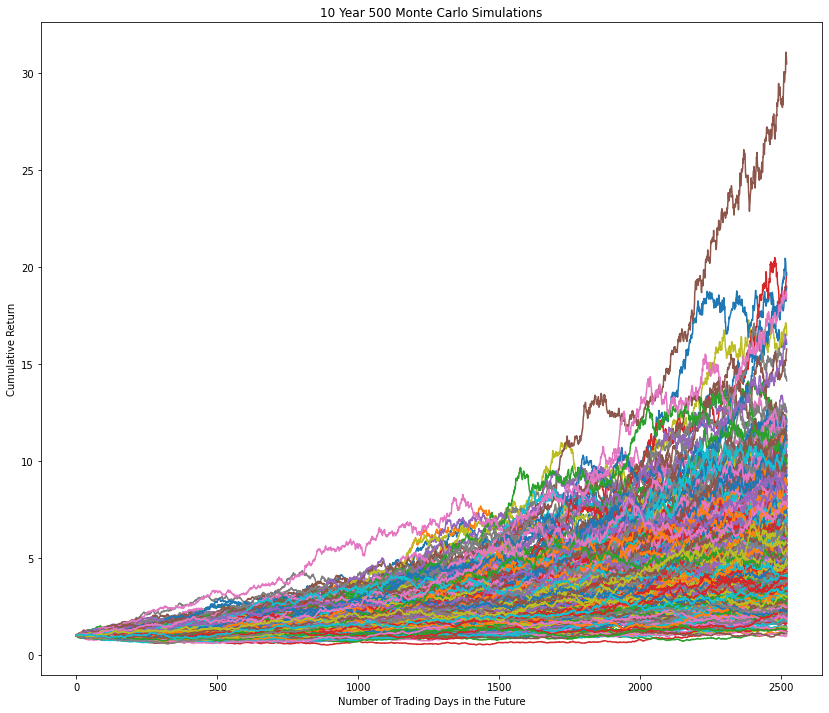

In [163]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
ten_mc_sim_df.plot(figsize=(14,12),
                   title="10 Year 500 Monte Carlo Simulations",
                   xlabel="Number of Trading Days in the Future",
                   ylabel="Cumulative Return",
                   legend=False)


Text(0.5, 0, 'Cumulative Return')

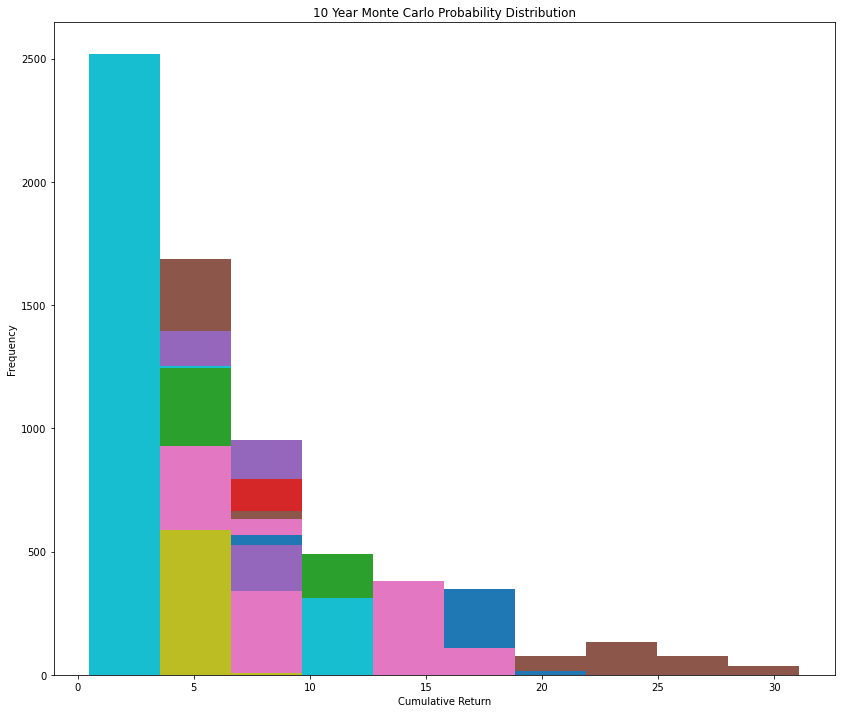

In [127]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
ten_mc_sim_df.plot(kind='hist',
                   title="10 Year Monte Carlo Probability Distribution",
                   figsize=(14,12),
                   legend=False).set_xlabel("Cumulative Return")


In [128]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
ten_mc_sim_summary_stats = ten_mc_sim_df.describe()


# Review the 10-year Monte Carlo summary statistics
ten_mc_sim_summary_stats

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
count,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000,...,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000
mean,2.175480,1.450824,1.680395,2.894345,3.424390,2.509635,5.029051,3.757341,2.023284,1.326816,...,2.247295,3.707422,3.105884,1.905088,3.845589,2.775942,4.023718,1.654569,2.625747,1.859535
std,0.804411,0.363681,0.585377,1.363085,2.623667,1.003238,3.311226,1.351511,1.199430,0.404400,...,0.695149,2.339111,1.832256,0.925796,2.319987,1.630780,2.215952,0.589800,1.495520,0.711440
min,0.969969,0.852688,1.000000,0.935699,0.873202,0.955203,0.892030,0.999002,0.774805,0.876521,...,0.797419,0.815553,0.723391,0.915489,0.987468,0.833970,0.988609,0.558726,0.939136,0.841764
25%,1.594369,1.266962,1.345910,1.700383,1.063252,1.692101,1.817969,2.968294,1.028734,1.025047,...,2.043640,1.525588,1.121092,1.085181,2.158839,1.379694,1.837354,1.020812,1.558201,1.275312
50%,1.812485,1.429662,1.483612,2.833894,2.041013,2.517250,3.783207,3.728597,1.513492,1.201132,...,2.410966,3.029269,3.397531,1.609015,2.648702,2.503677,3.676085,1.834931,2.040495,1.738503
75%,2.815094,1.586641,1.880949,3.790239,6.257702,3.368708,8.754875,4.120972,3.022652,1.477347,...,2.734613,5.781647,4.928215,2.556034,6.434711,4.025130,6.214081,2.162871,3.368617,2.437845
max,4.249775,3.002933,4.041027,6.817446,8.213594,4.581882,10.926772,7.239665,5.014869,2.666559,...,3.513473,9.147047,6.279502,4.053723,9.363553,6.520851,8.103977,2.730946,6.747771,3.469499


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [144]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"Current Stock and Bond Portfolio Balance: {total_stocks_bonds}")


Current Stock and Bond Portfolio Balance: 74470.1


In [146]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = ten_mc_sim_summary_stats.loc['min'].mean()
ci_upper_ten_cumulative_return = ten_mc_sim_summary_stats.loc['max'].mean()

# Print the result of your calculations
print(f"95% Confidence Interval Lower Bound Average: {ci_lower_ten_cumulative_return}"
      f"\nUpper Bound Average: {ci_upper_ten_cumulative_return}")


95% Confidence Interval Lower Bound Average: 0.9124320584509104
Upper Bound Average: 6.046528333872796


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

**Answer** 
### Yes! 
Weighting the portfolio more heavily towards stocks implies taking on more risk but, enough return on average to meet their 3x Monthly Income Emergency Fund size in only 10 years.

# Supplementary Student Analysis Beyond This Point
---

In [149]:
# SUPPLEMENTARY STUDENT ANALYSIS
print(f"40% Bonds and 60% Stocks 30 Year Forecast\nLower 95% Confidence Interval Average Cumulative Return: {ci_lower_thirty_cumulative_return}"
      f"\nUpper 95% Confidence Interval Average Cumulative Return: {ci_upper_thirty_cumulative_return}"
      f"\n\n20% Bonds and 80% Stocks 10 Year Forecast\n95% Confidence Interval Lower Bound Average: {ci_lower_ten_cumulative_return}"
      f"\nUpper Bound Average: {ci_upper_ten_cumulative_return}")

40% Bonds and 60% Stocks 30 Year Forecast
Lower 95% Confidence Interval Average Cumulative Return: 0.9356571489405355
Upper 95% Confidence Interval Average Cumulative Return: 67.40584003901266

20% Bonds and 80% Stocks 10 Year Forecast
95% Confidence Interval Lower Bound Average: 0.9124320584509104
Upper Bound Average: 6.046528333872796


In [153]:
# Just incase, I'd also include a 2000 monte carlo simulation with my 20% Bonds 80% Stocks portfolio
# Just to ensure the probability distribution I worked out earlier, still holds
student_ten_mc_obj = MCSimulation(three_prior_df, [0.2, 0.8], 2000, 10*252)
student_ten_mc_obj.portfolio_data

AGG                                      \
                             open      high      low   close   volume   
time                                                                    
2018-11-19 00:00:00-05:00  104.61  104.7299  104.610  104.66  4354256   
2018-11-20 00:00:00-05:00  104.67  104.7200  104.610  104.61  3015946   
2018-11-21 00:00:00-05:00  104.60  104.6900  104.580  104.68  5492705   
2018-11-23 00:00:00-05:00  104.84  104.8400  104.650  104.65  1536835   
2018-11-26 00:00:00-05:00  104.67  104.6700  104.590  104.63  3510989   
...                           ...       ...      ...     ...      ...   
2021-11-15 00:00:00-05:00  114.30  114.3100  113.910  113.93  6219329   
2021-11-16 00:00:00-05:00  113.92  114.1100  113.840  113.87  5317284   
2021-11-17 00:00:00-05:00  113.79  114.1300  113.770  114.13  5513227   
2021-11-18 00:00:00-05:00  114.05  114.2800  114.030  114.23  4115721   
2021-11-19 00:00:00-05:00  114.49  114.5900  114.415  114.45  4843203   

                                           SPY                              \
                          daily_return    open      high       low   close   
time                                                                         
2018-11-19 00:00:00-05:00          NaN  273.05  273.6176  266.7480  269.08   
2018-11-20 00:00:00-05:00    -0.000478  265.36  269.1000  263.1500  264.18   
2018-11-21 00:00:00-05:00     0.000669  265.86  267.1500  264.2527  265.08   
2018-11-23 00:00:00-05:00    -0.000287  263.18  265.0662  263.0700  263.34   
2018-11-26 00:00:00-05:00    -0.000191  265.78  268.2909  263.3652  267.46   
...                                ...     ...       ...       ...     ...   
2021-11-15 00:00:00-05:00    -0.003499  468.64  468.8100  466.2300  467.39   
2021-11-16 00:00:00-05:00    -0.000527  467.16  470.4850  467.0700  469.24   
2021-11-17 00:00:00-05:00     0.002283  469.00  469.1900  467.4800  468.11   
2021-11-18 00:00:00-05:00     0.000876  469.24  470.0100  466.3400  469.71   
2021-11-19 00:00:00-05:00     0.001926  469.61  470.9400  468.5000  468.91   

                                                   
                              volume daily_return  
time                                               
2018-11-19 00:00:00-05:00   86509084          NaN  
2018-11-20 00:00:00-05:00  121173305    -0.018210  
2018-11-21 00:00:00-05:00   64743156     0.003407  
2018-11-23 00:00:00-05:00   36245484    -0.006564  
2018-11-26 00:00:00-05:00   67385154     0.015645  
...                              ...          ...  
2021-11-15 00:00:00-05:00   39813913     0.000278  
2021-11-16 00:00:00-05:00   41723421     0.003958  
2021-11-17 00:00:00-05:00   40088372    -0.002408  
2021-11-18 00:00:00-05:00   45100029     0.003418  
2021-11-19 00:00:00-05:00   49009452    -0.001703  

[757 rows x 12 columns]

In [154]:
supp_df = student_ten_mc_obj.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/home/sfdev/Documents/FinTech Activities/Challenge Repo/Module 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

<AxesSubplot:title={'center':'Supplementary 2000 Monte Carlo Simulations'}, xlabel='# of Trading Days in Future', ylabel='Cumulative Return'>

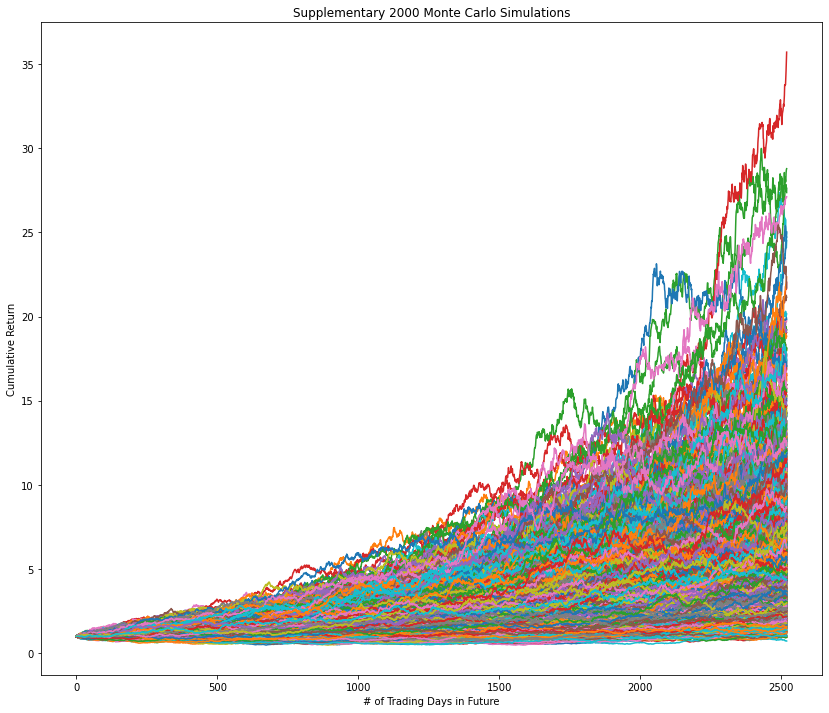

In [158]:
supp_df.plot(title="Supplementary 2000 Monte Carlo Simulations",
             xlabel="# of Trading Days in Future", 
             ylabel="Cumulative Return",
             figsize=(14,12),
             legend=False)

In [160]:
supp_stats = supp_df.describe()
supp_stats

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
count,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000,...,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000
mean,2.799825,2.352240,2.725760,2.586226,4.876558,1.859991,2.757586,3.885694,2.344168,2.091008,...,1.609141,3.778821,1.922112,3.892186,3.150362,1.413584,2.777852,1.822507,2.906541,2.664410
std,1.114622,1.104146,1.339131,1.128466,4.097428,0.610175,1.689515,3.303373,0.905389,1.275494,...,0.671662,1.928320,0.999482,2.710410,1.903536,0.337569,1.391654,0.430794,1.674070,1.202134
min,0.978973,0.989252,0.900909,0.941950,0.914061,0.952807,0.863403,0.860195,0.937891,0.732795,...,0.835664,0.915504,0.931248,0.815066,1.000000,0.962712,0.922851,0.933628,0.995064,0.938068
25%,1.901075,1.421231,1.328735,1.780763,1.553255,1.160543,1.338134,1.121108,1.706991,0.999703,...,1.021358,1.948830,1.220177,1.725953,1.627250,1.182909,1.281645,1.405245,1.306802,1.783021
50%,2.751141,1.925226,2.588470,2.023668,2.871199,1.935663,2.475648,2.477014,2.102285,1.471666,...,1.512649,3.406242,1.447711,2.674914,2.355784,1.283580,2.737449,1.918767,2.526618,2.443091
75%,3.433267,3.204179,3.877506,3.647004,6.810305,2.366265,3.191237,5.022693,2.941405,2.947453,...,1.931521,5.637147,2.214043,6.156018,4.575055,1.593554,3.764334,2.158453,4.038211,3.452742
max,5.594842,5.371791,5.693702,4.917006,15.559860,3.324204,8.091518,13.830888,4.158514,5.653157,...,3.942517,7.752814,5.077302,11.571967,8.298736,2.503777,6.753446,2.645236,7.489110,5.834882


In [162]:
ci_lower_supp = supp_stats.loc['min'].mean()
ci_upper_supp = supp_stats.loc['max'].mean()
print(f"95% Confidence Interval Lower Bound Average: {ci_lower_supp}"
      f"\nUpper Bound Average: {ci_upper_supp}")

95% Confidence Interval Lower Bound Average: 0.912931747060227
Upper Bound Average: 6.2641079680414515
